<a href="https://colab.research.google.com/github/ameya932/world_happiness_report/blob/main/World_Happiness_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

whr2021_report = report

whr2021_report_raw = df

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [4]:
path = "/content/drive/MyDrive/DataForFigure2.1WHR2021C2.xls"
df = pd.read_excel(path)

**DATA PREPARATION AND CLEANING**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [6]:
df.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532832,0.058764,5.648008,5.417655,9.432209,0.814726,64.992784,0.791572,-0.015149,0.727477,2.430343,0.977153,0.793315,0.520132,0.498687,0.178091,0.135112,2.430343
std,1.073923,0.022011,1.054320,1.094875,1.158585,0.114892,6.762071,0.113315,0.150653,0.179266,0.000000,0.404777,0.258840,0.212971,0.137885,0.098277,0.114322,0.537653
min,2.522900,0.025583,2.596468,2.449332,6.635322,0.462596,48.478001,0.381749,-0.288153,0.081959,2.430343,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648460
25%,4.851800,0.043369,4.991074,4.705666,8.540956,0.749777,59.801552,0.718051,-0.126469,0.666607,2.430343,0.665774,0.646990,0.356634,0.409224,0.105473,0.060408,2.138343
50%,5.533500,0.054181,5.624688,5.413106,9.568728,0.831914,66.603096,0.804414,-0.036025,0.780623,2.430343,1.024849,0.832038,0.570849,0.514314,0.164473,0.101220,2.509446
75%,6.255400,0.069863,6.344270,6.127992,10.421198,0.904702,69.599998,0.877263,0.078830,0.844619,2.430343,1.322677,0.996021,0.665236,0.602958,0.239398,0.173931,2.793570
max,7.842100,0.172664,7.904126,7.780075,11.646564,0.982938,76.952858,0.970131,0.541553,0.939343,2.430343,1.750786,1.172279,0.896814,0.715964,0.541250,0.546775,3.482495




* The Ranking consists of 149 countries and there are no null values.




In [7]:
df.sample()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
95,Niger,Sub-Saharan Africa,5.0741,0.101609,5.273253,4.874947,7.097615,0.641138,53.780006,0.806124,0.01845,0.692541,2.430343,0.161512,0.402237,0.166986,0.516394,0.200009,0.157392,3.469616


Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables - levels of GDP, life expectancy, generosity, social support, freedom, and corruption (includes other criterias/variables too)



*   We will drop the statistical columns and the "Explained by: " columns since these have no direct impact on the total score reported for each country, but instead are just a way of explaining for each country the implications/contribution of these variables to the Ladder Score.

*   We will create a copy, so that we dont messup the original dataframe.



In [9]:
ladder_score_dystopia = df['Ladder score in Dystopia'][0]
report = df.copy()
report = report.loc[:,:'Perceptions of corruption']
report.drop(columns=['Standard error of ladder score','upperwhisker','lowerwhisker'],inplace=True)
report.set_index('Country name',inplace=True)
rank = np.arange(1,len(report)+1)
report.insert(0,'Rank',rank)
report.sample(3)

,Rank,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country name,,,,,,,,,
Uzbekistan,42,Commonwealth of Independent States,6.1788,8.836421,0.918469,65.255310,0.970131,0.310706,0.515089
Brazil,35,Latin America and Caribbean,6.3301,9.577305,0.881597,66.600876,0.804414,-0.071048,0.756397
Israel,12,Middle East and North Africa,7.1571,10.574758,0.939231,73.503258,0.800027,0.030682,0.753111


**EXPLORATORY DATA ANALYSIS AND VISUALIZATION**

In [10]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [11]:
report.describe()

,Rank,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,75.000000,5.532832,9.432209,0.814726,64.992784,0.791572,-0.015149,0.727477
std,43.156691,1.073923,1.158585,0.114892,6.762071,0.113315,0.150653,0.179266
min,1.000000,2.522900,6.635322,0.462596,48.478001,0.381749,-0.288153,0.081959
25%,38.000000,4.851800,8.540956,0.749777,59.801552,0.718051,-0.126469,0.666607
50%,75.000000,5.533500,9.568728,0.831914,66.603096,0.804414,-0.036025,0.780623
75%,112.000000,6.255400,10.421198,0.904702,69.599998,0.877263,0.078830,0.844619
max,149.000000,7.842100,11.646564,0.982938,76.952858,0.970131,0.541553,0.939343


Apart from 'Logged GDP per capita' and 'Healthy life expectancy', all are within a scale of 0 to 1 or -1 to 1. We shall try to understand the distribution of the data available.

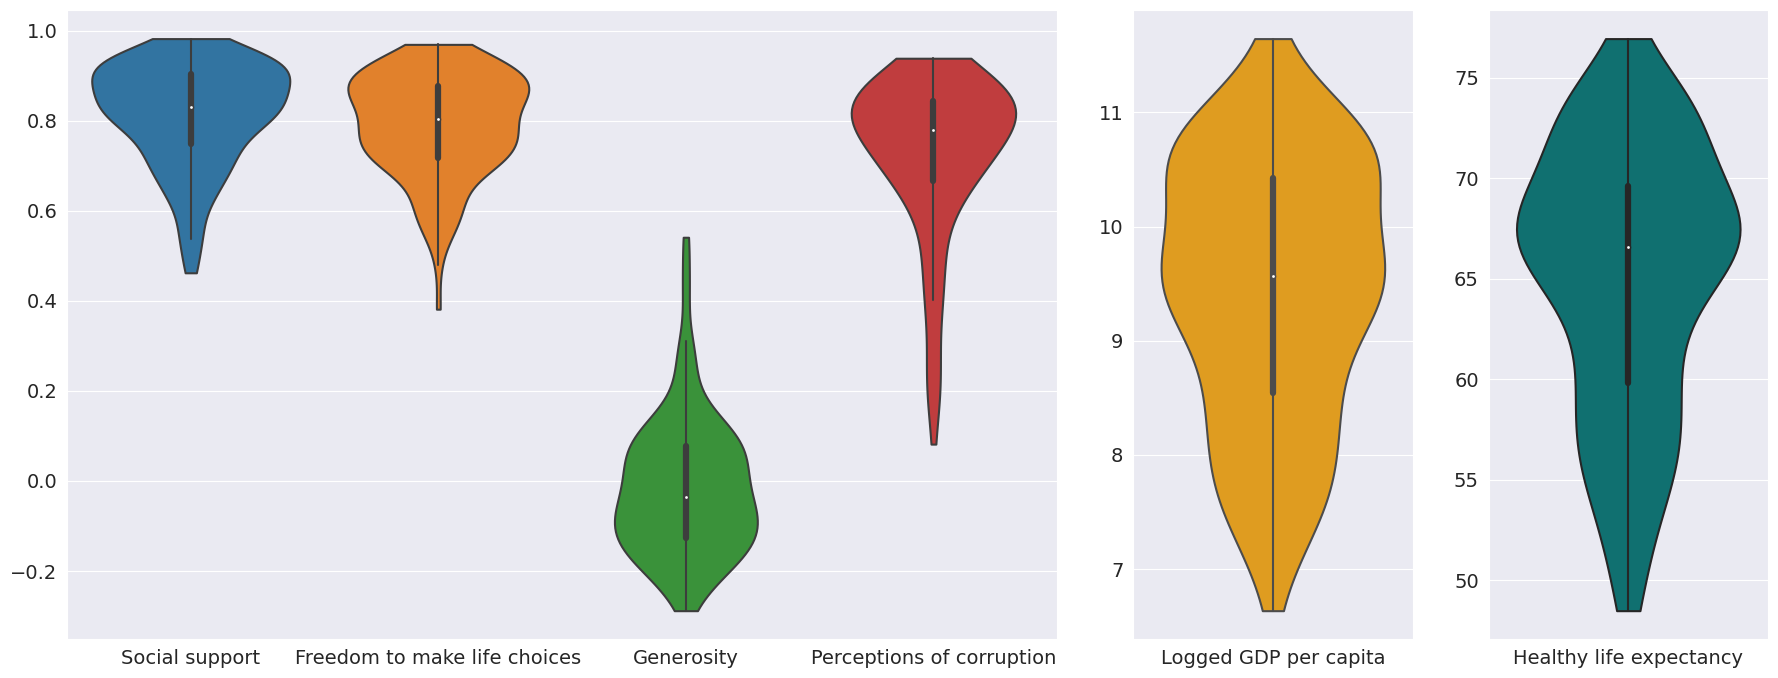

In [12]:
fig, ax = plt.subplots(1,5,figsize=(18,7))
gs = ax[0].get_gridspec()
for axes in ax[:-2]:
    axes.remove()
axbig = fig.add_subplot(gs[:-2])

sns.violinplot(data=report.loc[:, ['Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']],
               orient='v',
               cut=0,
               ax=axbig)
sns.violinplot(data=report.loc[:, ['Logged GDP per capita']], orient='v', cut=0, ax=ax[-2], color='orange')
sns.violinplot(data=report.loc[:, ['Healthy life expectancy']], orient='v', cut=0, ax=ax[-1], color='teal')
fig.tight_layout()
plt.show()